## Ève Castonguay, UQAM - Laboratoire 3, expérience 1
### Créé le 13/09/2025

# Champs spatiaux

#### Lire le fichier

In [1]:
# packages
import os
import cartopy.crs as ccrs
import sys
import glob
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
from dateutil import tz
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
from matplotlib.pyplot import title, xlabel, yscale, ylabel, xticks
from numpy.ma.core import shape
from scipy.spatial import cKDTree, KDTree
import pandas as pd
from scipy.stats import alpha

from E_01.series_temporelles import mean_pcpts

# accès aux données
path_file='/Users/evecastonguay/Desktop/Labo/E_01/imerg_pr_201911_3h.nc4'
var_name='precipitationCal'
print('Reading file: ',path_file)
ds = xr.open_dataset(path_file)
ds.close()
print('Reading file: DONE')
pcpts = ds[var_name]
lons = ds['lon']
lats = ds['lat']

Reading file:  /Users/evecastonguay/Desktop/Labo/E_01/imerg_pr_201911_3h.nc4
Reading file: DONE


#### 1) Distribution spatiale du taux de précipitation du 1er novembre à 12 UTC

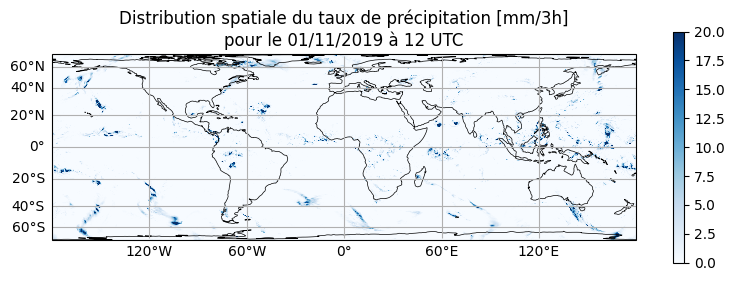

In [107]:
nov_01 = ds.sel(time='2019-11-01T12:00:00.00')
nov_01_pcpts = nov_01[var_name].values # (1800, 3600) numpy.ndarray

# projection cylindrique Lambert (code de https://scitools.org.uk/cartopy/docs/v0.10/crs/projections.html)
plt.figure(figsize=(9.42477796077, 3))
ax = plt.axes(projection=ccrs.LambertCylindrical())
ax.coastlines(resolution='110m',linewidths=0.5)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)

# précipitations sur la carte
im = ax.pcolormesh(lons,lats,nov_01_pcpts,vmin=0,vmax=20,cmap='Blues')
plt.colorbar(im)
ax.set(title=f"Distribution spatiale du taux de précipitation [mm/3h]\npour le 01/11/2019 à 12 UTC")

plt.show()

#### 2) Histogramme des précipitations du 1er novembre à 12 UTC

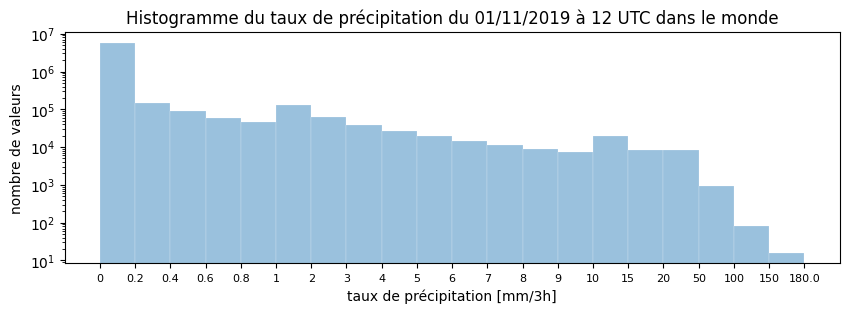

'\n# HISTOGRAMME CONVENTIONNEL:\nmy_bins = [0,0.2,0.4,0.6,0.8,1,2,3,4,5,6,7,8,9,10,15,20,50,100,150,200]\nfig, ax = plt.subplots()\nax.hist(nov_01_pcpts,bins=my_bins,color=\'mediumseagreen\',edgecolor="white", linewidth=0.3,alpha=0.8) #range=(0,10)\nax.set(title="Histogramme des précipitations du 01/11/2019 à 12 UTC",\n       yscale=\'log\',xlabel=\'taux de précipitation [mm/3h]\',ylabel=\'nombre de valeurs\',\n       xticks=[0,10,20,50,100,150,200])\nplt.show()\n'

In [108]:
nov_01 = ds.sel(time='2019-11-01T12:00:00.00')
nov_01_pcpts = nov_01[var_name].values # (1800, 3600) numpy.ndarray

# trouver la valeur max de précipitation dans le monde
max = np.round(np.amax(nov_01_pcpts),0) # 180.42758 mm/3h

# transformer le tableau de taille 1800 x 3600 en un tableau 1D (comme une liste)
nov_01_pcpts = nov_01_pcpts.flatten()

# créer le graphique
my_bins = [0,0.2,0.4,0.6,0.8,1,2,3,4,5,6,7,8,9,10,15,20,50,100,150,max] # 0,0.2,0.4,0.6,0.8,1,2,3,4,5,6,7,8,9,10,15,20,50,100,150,200
fig, ax = plt.subplots(figsize=(10,3))
hist, bins = np.histogram(nov_01_pcpts, bins=my_bins)
center = np.array(bins[:-1] + bins[1:])/ 2
center_rounded = np.round(center, 1)
ticks = np.arange(5,205, 10)
width = ticks[1]-ticks[0]
plt.bar(ticks, hist, width=width, color='tab:blue', edgecolor="white", linewidth=0.3, alpha=0.45)
plt.xticks(fontsize=8)
ax.set(title="Histogramme du taux de précipitation du 01/11/2019 à 12 UTC dans le monde", yscale='log',xlabel='taux de précipitation [mm/3h]',ylabel='nombre de valeurs', xticks=np.arange(0,210,10), xticklabels=my_bins)
plt.show()

'''
# HISTOGRAMME CONVENTIONNEL:
my_bins = [0,0.2,0.4,0.6,0.8,1,2,3,4,5,6,7,8,9,10,15,20,50,100,150,200]
fig, ax = plt.subplots()
ax.hist(nov_01_pcpts,bins=my_bins,color='mediumseagreen',edgecolor="white", linewidth=0.3,alpha=0.8) #range=(0,10)
ax.set(title="Histogramme des précipitations du 01/11/2019 à 12 UTC",
       yscale='log',xlabel='taux de précipitation [mm/3h]',ylabel='nombre de valeurs',
       xticks=[0,10,20,50,100,150,200])
plt.show()
'''

#### 3) Distribution spatiale du taux de précipitation moyenné sur le mois de novembre

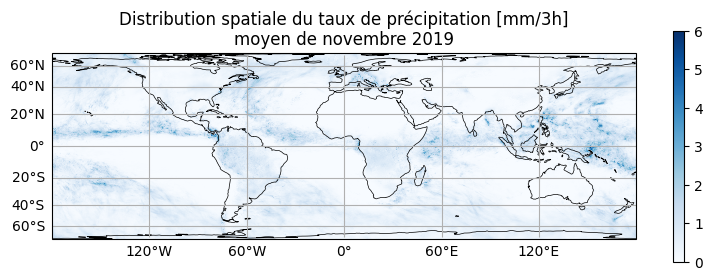

In [174]:
pcpts = ds[var_name].values # ndarray (240, 1800, 3600)
mean_pcpts = pcpts.mean(axis=0) # ndarray (1800, 3600), max = 6
lons = ds['lon']
lats = ds['lat']

# projection cylindrique Lambert (code de https://scitools.org.uk/cartopy/docs/v0.10/crs/projections.html)
plt.figure(figsize=(9.42477796077, 3))
ax = plt.axes(projection=ccrs.LambertCylindrical())
ax.coastlines(resolution='110m',linewidths=0.5)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)

# précipitations sur la carte
im = ax.pcolormesh(lons,lats,mean_pcpts,vmin=0,vmax=6,cmap='Blues')
plt.colorbar(im)
ax.set(title=f"Distribution spatiale du taux de précipitation [mm/3h]\nmoyen de novembre 2019")

plt.show()

#### 4) Histogramme du taux de précipitation moyenné sur le mois de novembre

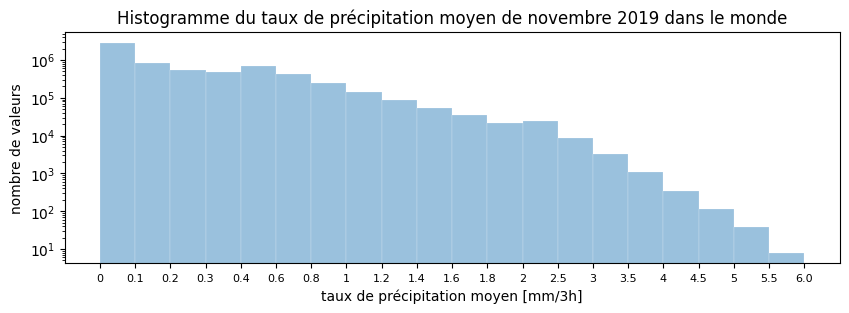

In [149]:
pcpts = ds[var_name].values # ndarray (240, 1800, 3600)
mean_pcpts = pcpts.mean(axis=0) # ndarray (1800, 3600)

# trouver la valeur max de précipitation dans le monde
max =  np.round(np.amax(mean_pcpts),0) # 6

# transformer le tableau de taille 1800 x 3600 en un tableau 1D (comme une liste)
mean_pcpts = mean_pcpts.flatten()

# créer le graphique
my_bins = [0,0.1,0.2,0.3,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.5,3,3.5,4,4.5,5,5.5,max]
fig, ax = plt.subplots(figsize=(10,3))
hist, bins = np.histogram(mean_pcpts, bins=my_bins)
center = np.array(bins[:-1] + bins[1:])/ 2
center_rounded = np.round(center, 1)
ticks = np.arange(0.15,6.15,0.3)
width = ticks[1]-ticks[0]
plt.bar(ticks, hist, width=width, color='tab:blue', edgecolor="white", linewidth=0.3, alpha=0.45)
plt.xticks(fontsize=8)
ax.set(title="Histogramme du taux de précipitation moyen de novembre 2019 dans le monde", yscale='log',xlabel='taux de précipitation moyen [mm/3h]',ylabel='nombre de valeurs',xticks=np.arange(0,6.3,0.3), xticklabels=my_bins)
plt.show()


#### 5) Distribution spatiale du taux de précipitation moyenné sur novembre pour Montréal

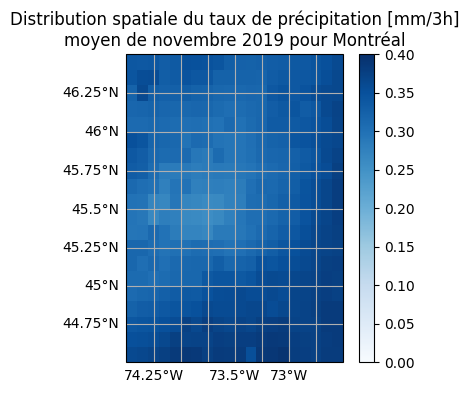

In [192]:
import cartopy.feature as cfeature

# choix des degrés autour de Montréal
mtl_lat = 45.5
mtl_lon = -73.5

mtl_lat_inf = mtl_lat-1
mtl_lat_sup = mtl_lat+1
mtl_lon_inf = mtl_lon-1
mtl_lon_sup = mtl_lon+1

# création du dataset approprié
nov_mtl = ds.sel(lon=slice(mtl_lon_inf,mtl_lon_sup), lat=slice(mtl_lat_inf,mtl_lat_sup))
lons = nov_mtl['lon'].values # 20
lats = nov_mtl['lat'].values # 20
pcpts = nov_mtl[var_name].values # ndarray (240, 20, 20)
mean_pcpts = pcpts.mean(axis=0)
max = round(np.amax(mean_pcpts),1) # 0.4

# projection Mercator (code de https://scitools.org.uk/cartopy/docs/v0.10/crs/projections.html)
plt.figure(figsize=(4, 4))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='110m',linewidths=0.5)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, x_inline=False, y_inline=False)

# précipitations sur la carte
im = ax.pcolormesh(lons,lats,mean_pcpts,vmin=0,vmax=max,cmap='Blues',transform=ccrs.PlateCarree()) # attention aux coordonnées mercator vs sphériques/régulières
plt.colorbar(im)
ax.set(title=f"Distribution spatiale du taux de précipitation [mm/3h]\nmoyen de novembre 2019 pour Montréal")
plt.show()

# problèmes
# 1) voit pas délimitation Montréal
# 2) ticks



#### 6) Distribution spatiale du taux de précipitation moyenné sur novembre pour Montréal

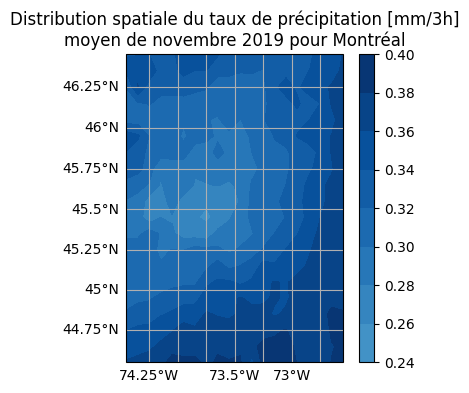

In [193]:
# choix des degrés autour de Montréal
mtl_lat = 45.5
mtl_lon = -73.5

mtl_lat_inf = mtl_lat-1
mtl_lat_sup = mtl_lat+1
mtl_lon_inf = mtl_lon-1
mtl_lon_sup = mtl_lon+1

# création du dataset approprié
nov_mtl = ds.sel(lon=slice(mtl_lon_inf,mtl_lon_sup), lat=slice(mtl_lat_inf,mtl_lat_sup))
lons = nov_mtl['lon'].values # 20
lats = nov_mtl['lat'].values # 20
pcpts = nov_mtl[var_name].values # ndarray (240, 20, 20)
mean_pcpts = pcpts.mean(axis=0)
max = round(np.amax(mean_pcpts),1) # 0.4

# projection Mercator (code de https://scitools.org.uk/cartopy/docs/v0.10/crs/projections.html)
plt.figure(figsize=(4, 4))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='110m',linewidths=0.5)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, x_inline=False, y_inline=False)

# précipitations sur la carte
im = ax.contourf(lons,lats,mean_pcpts,vmin=0,vmax=max,cmap='Blues',transform=ccrs.PlateCarree()) # attention aux coordonnées mercator vs sphériques/régulières
plt.colorbar(im)
ax.set(title=f"Distribution spatiale du taux de précipitation [mm/3h]\nmoyen de novembre 2019 pour Montréal")
plt.show()